<a href="https://colab.research.google.com/github/Mahadev5/Parametric_Soybean/blob/main/Soybean%20Parametric%20Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library importing

In [4]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

!pip install netCDF4
import netCDF4 as Dataset
import numpy as np

Testing NCF dataset

In [8]:
file_2022='/home/RF25_ind2022_rfp25.nc'
rainfall_2022 = netCDF4.Dataset(file_2022, 'r')
print(rainfall_2022)

<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V7.5 (optimized) 20-Jan-23
    Conventions: CF-1.6
    dimensions(sizes): LONGITUDE(135), LATITUDE(129), TIME(365)
    variables(dimensions): float64 LONGITUDE(LONGITUDE), float64 LATITUDE(LATITUDE), float64 TIME(TIME), float64 RAINFALL(TIME, LATITUDE, LONGITUDE)
    groups: 


Extract the data

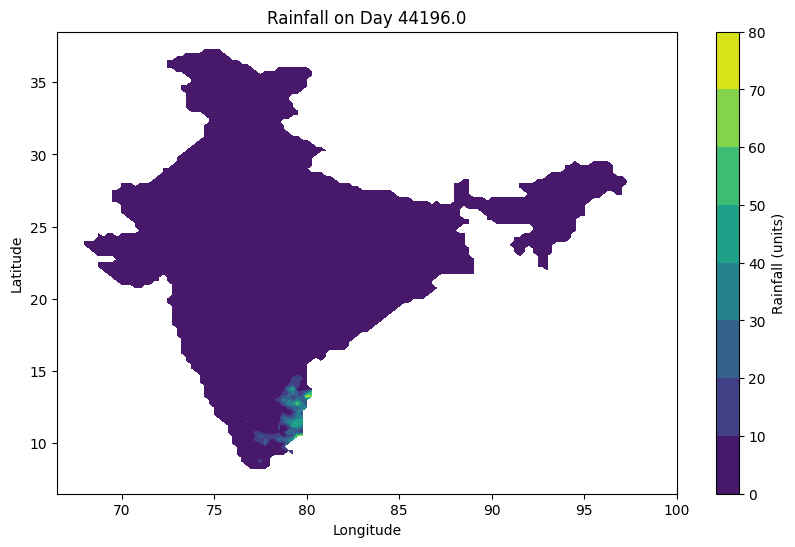

In [10]:
# Extract necessary variables
longitude = rainfall_2022.variables['LONGITUDE'][:]
latitude = rainfall_2022.variables['LATITUDE'][:]
time = rainfall_2022.variables['TIME'][:]
rainfall = rainfall_2022.variables['RAINFALL'][:]

# Plotting the rainfall data for the first day (time[0])
rainfall_day_0 = rainfall[0, :, :]

# Plot the rainfall for the first day
plt.figure(figsize=(10, 6))
plt.contourf(longitude, latitude, rainfall_day_0, cmap='viridis')
plt.colorbar(label='Rainfall (units)')  # Adjust units as per your dataset
plt.title(f"Rainfall on Day {time[0]}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plotting the average rainfall over the entire year (averaging over the time dimension)
rainfall_avg = np.mean(rainfall, axis=0)  # Average over time (axis=0)